In [21]:
#import pyFAI
#import pyFAI.calibrant
#import pyFAI.detectors
import os, glob, re
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox
import ipywidgets as widgets
from tifffile import imread, imshow, imsave
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
from matplotlib.widgets import Slider, Button
import yaml, tifffile
%matplotlib widget

total number of images =  36
A_emptykapton_Pilatus_20241117-191339_6424ab_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-191843_047aaa_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-192349_113050_primary-dk_sub_image-0.tiff
len(im_spotA)=1679
len(im_spotB)=1679
len(im_spotC)=1679


C:\Users\gkwon\AppData\Local\Temp\1\ipykernel_8572\1093218492.py:52: RuntimeWarning: Mean of empty slice
  return np.nanmean(my_imsum,axis=2)
C:\Users\gkwon\AppData\Local\Temp\1\ipykernel_8572\1093218492.py:102: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(f"{File_Name_Prefix}" + str(f1) + "-" + str(f2) +"_sum.tiff", full_imsum)


(1733, 1529)
A_emptykapton_Pilatus_20241117-192853_1cfbb3_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-193357_ddd0d6_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-193903_4692d3_primary-dk_sub_image-0.tiff
len(im_spotA)=1679
len(im_spotB)=1679
len(im_spotC)=1679
(1733, 1529)
A_emptykapton_Pilatus_20241117-194407_9f84ba_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-194911_1b7b66_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-195417_1d709f_primary-dk_sub_image-0.tiff
len(im_spotA)=1679
len(im_spotB)=1679
len(im_spotC)=1679
(1733, 1529)
A_emptykapton_Pilatus_20241117-195921_4bae04_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-200425_d596ad_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-200932_f5cd17_primary-dk_sub_image-0.tiff
len(im_spotA)=1679
len(im_spotB)=1679
len(im_spotC)=1679
(1733, 1529)
A_emptykapton_Pilatus_20241117-201435_f51fde_primary-dk_sub_image-0.tiff
A_emptykapton_Pilatus_20241117-201940_b538e0_pr

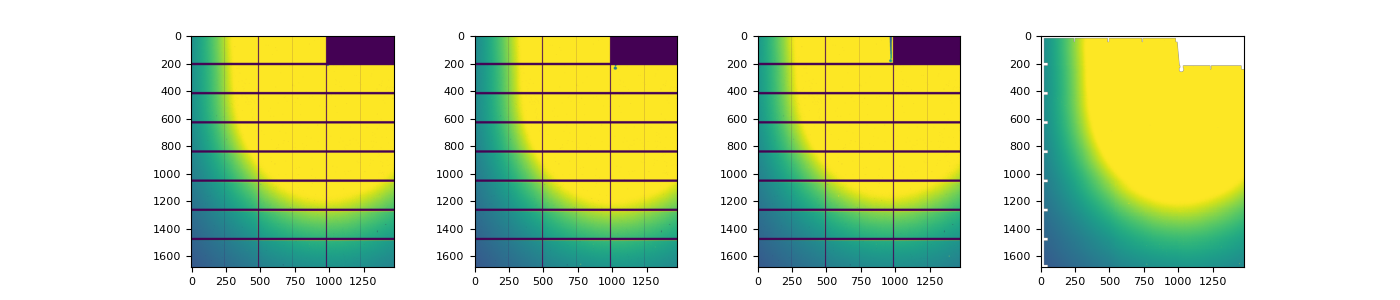

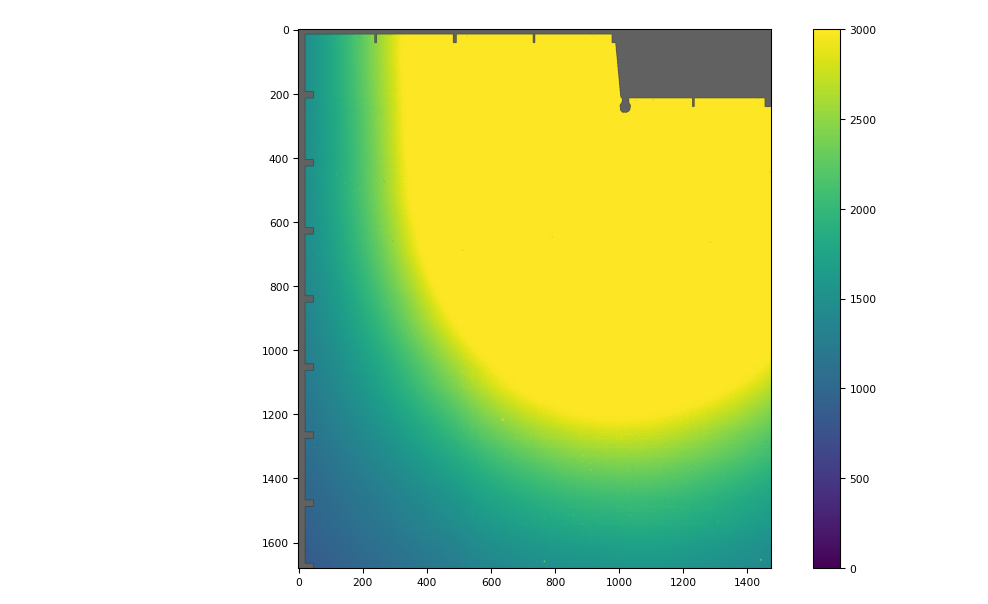

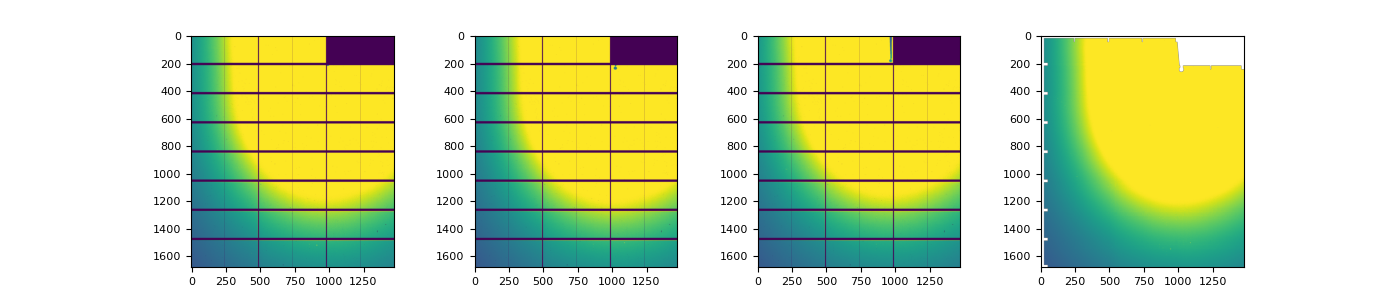

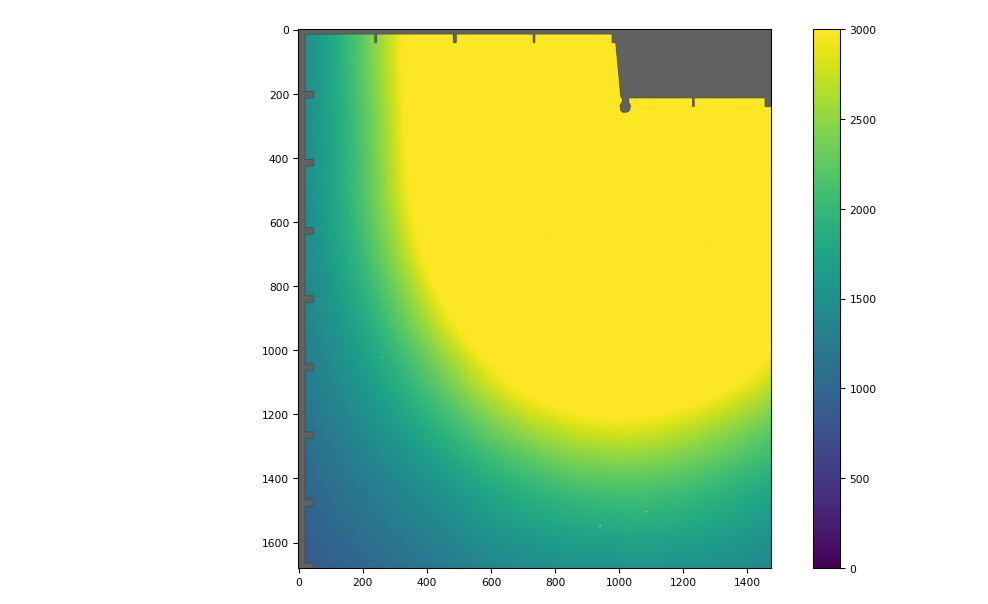

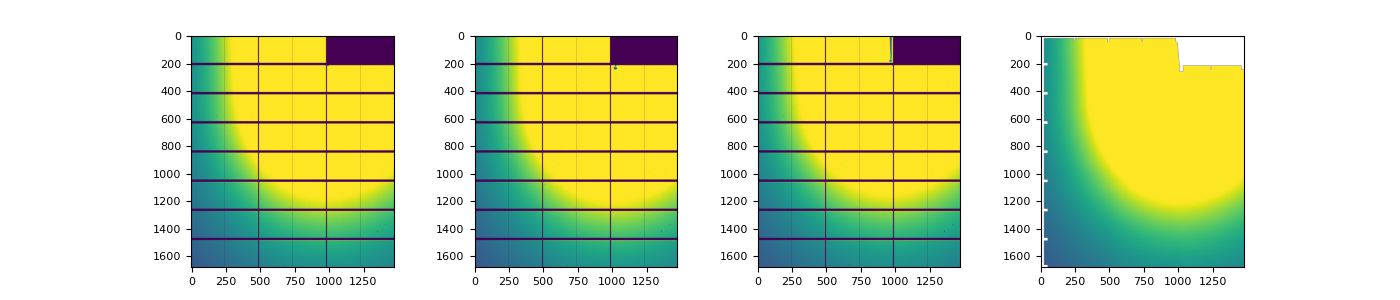

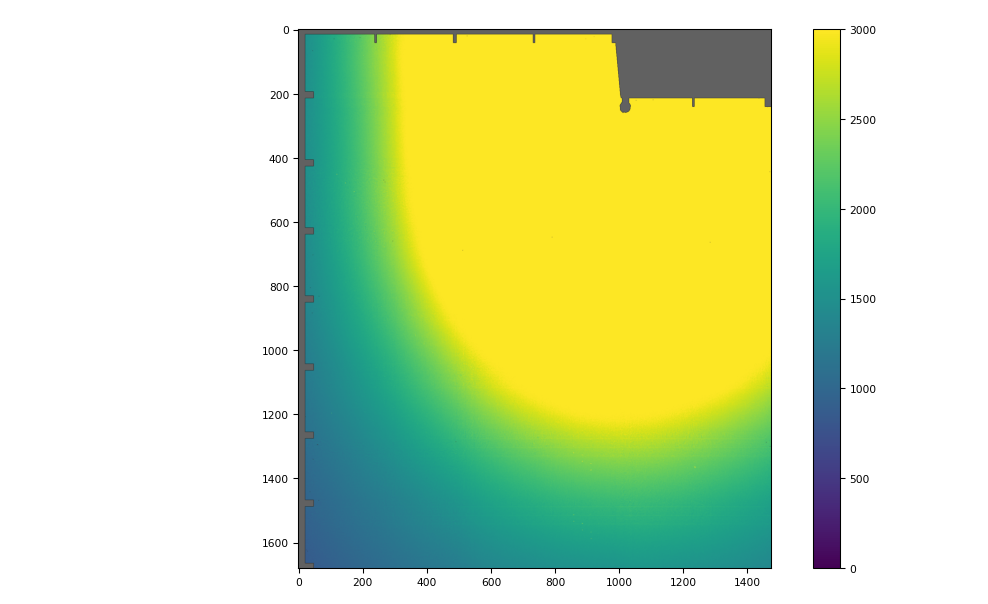

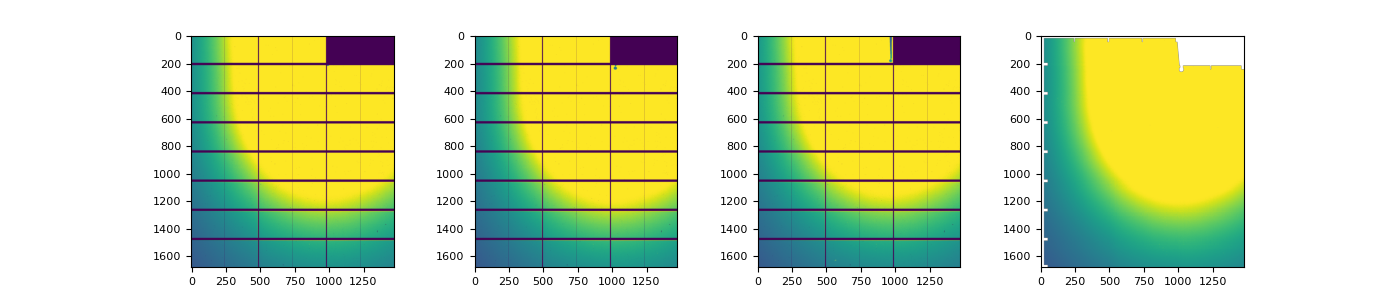

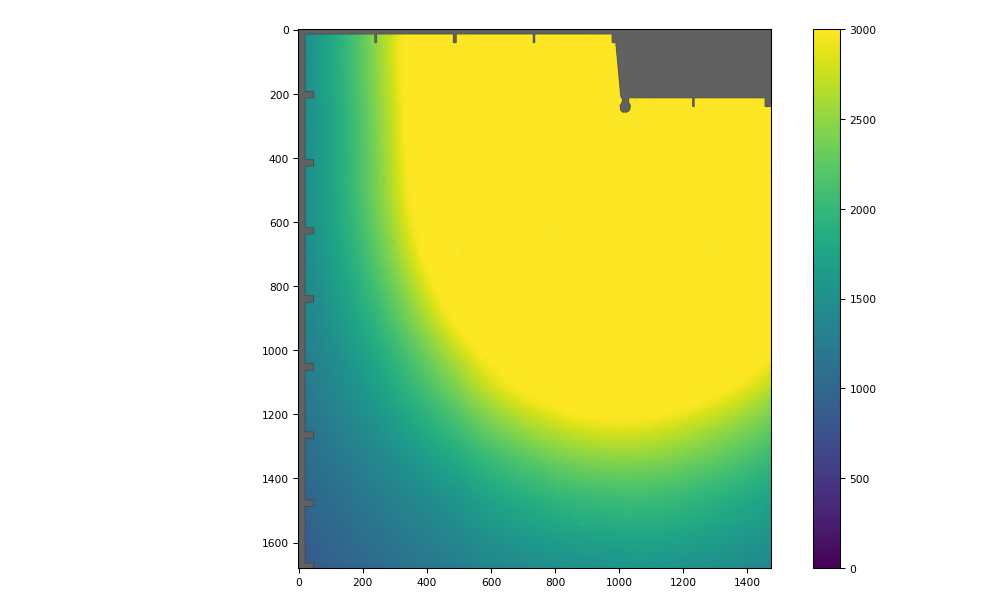

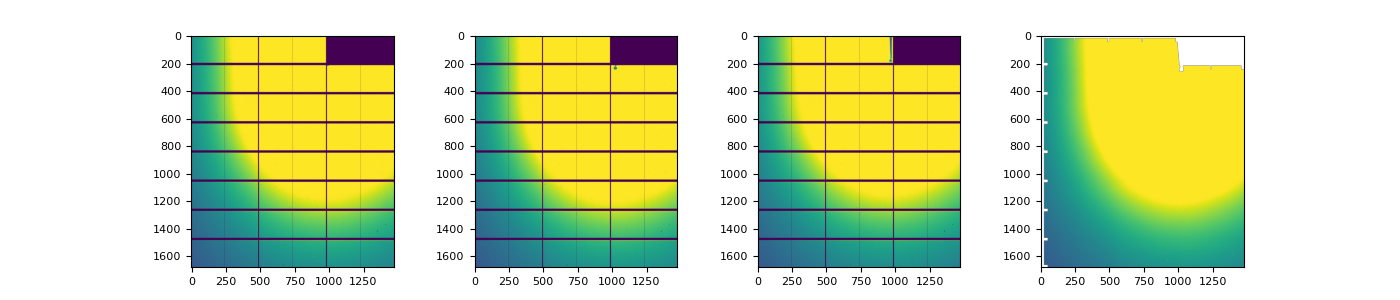

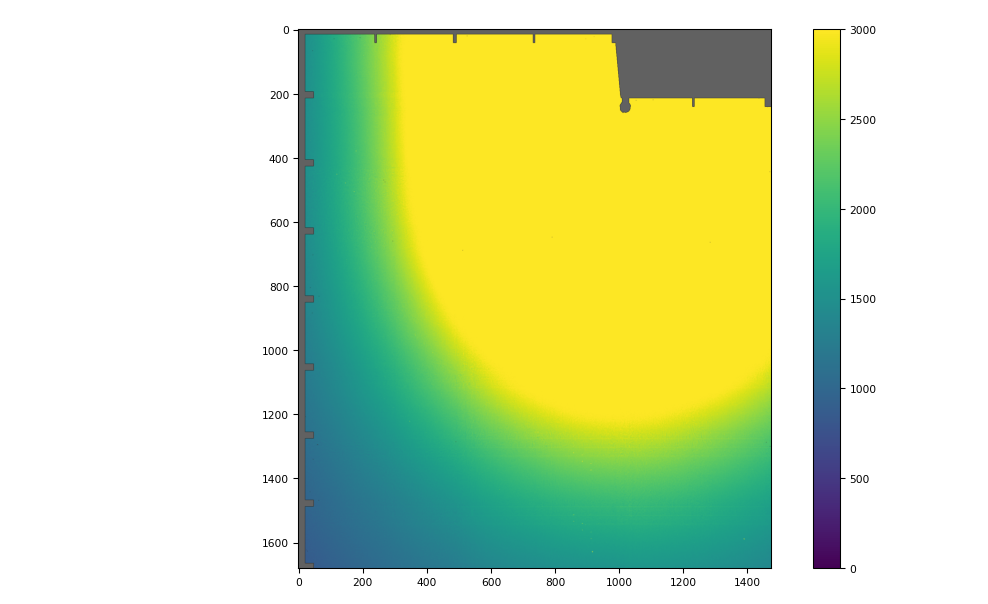

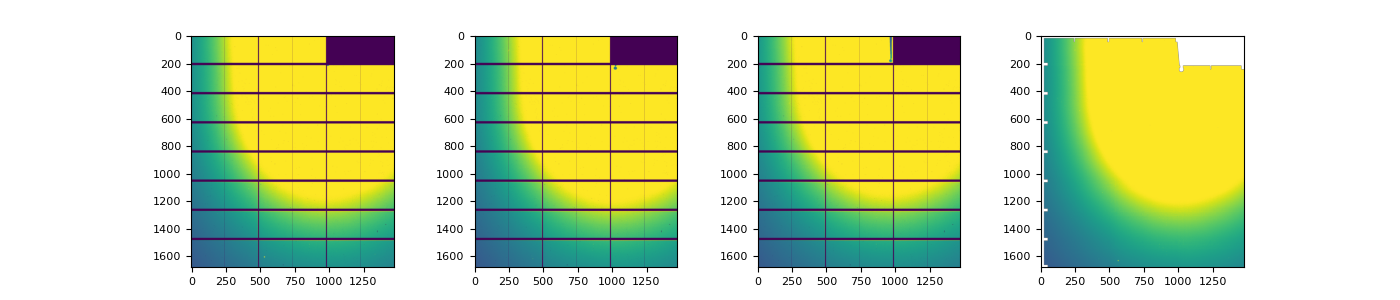

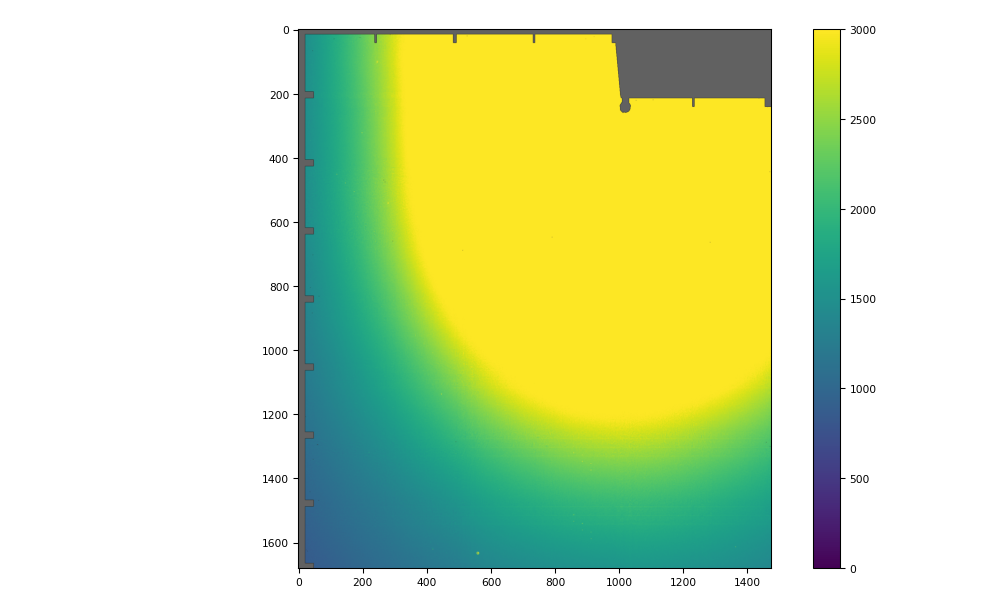

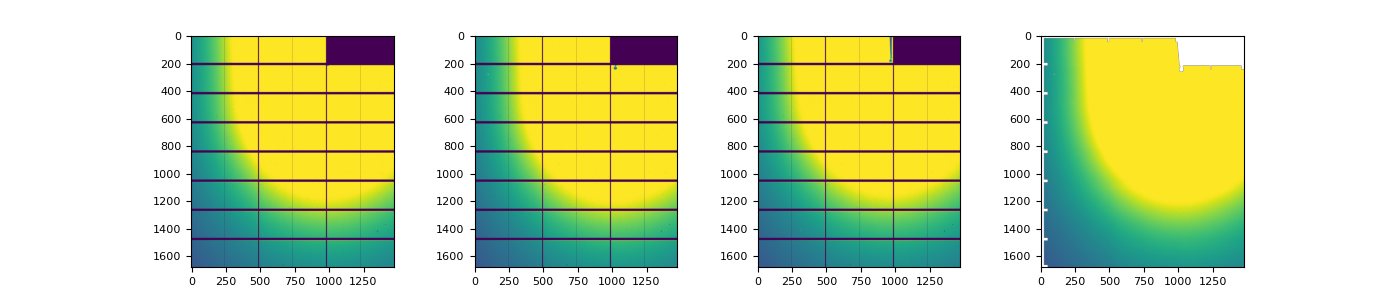

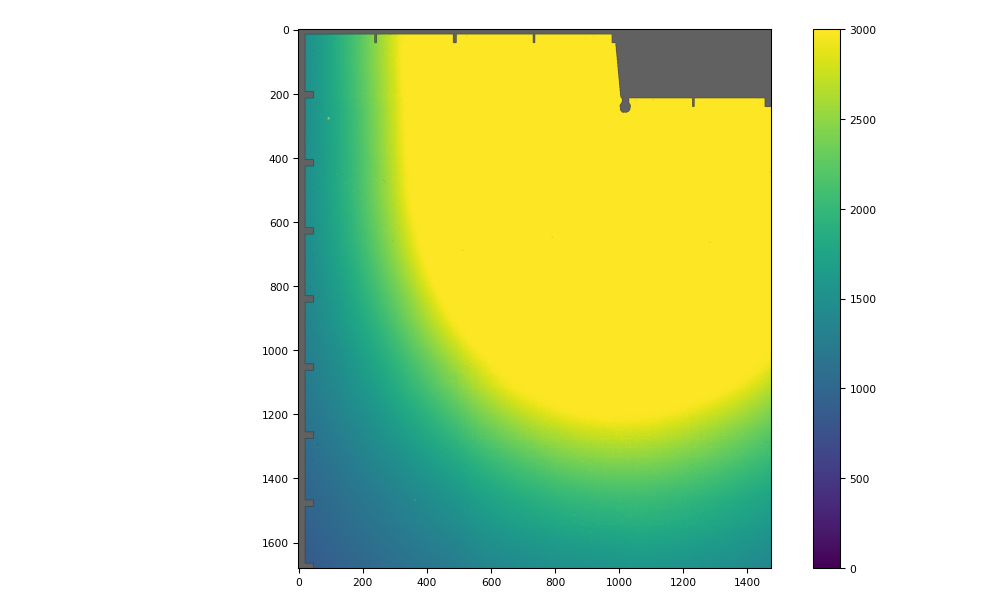

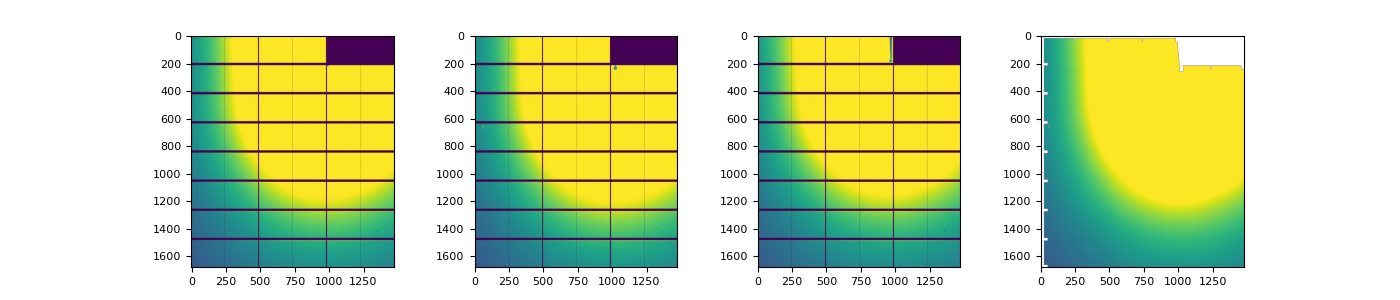

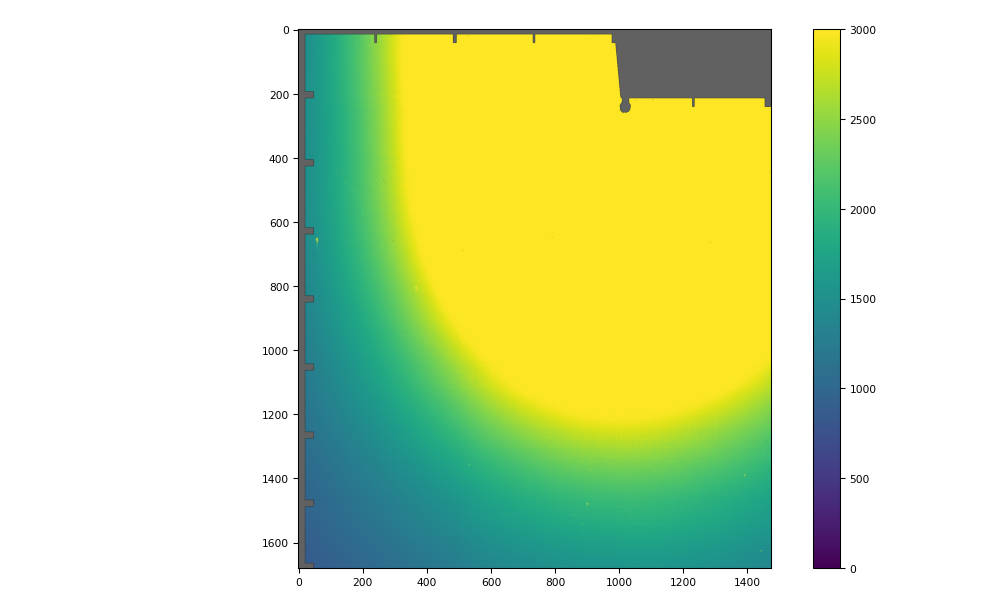

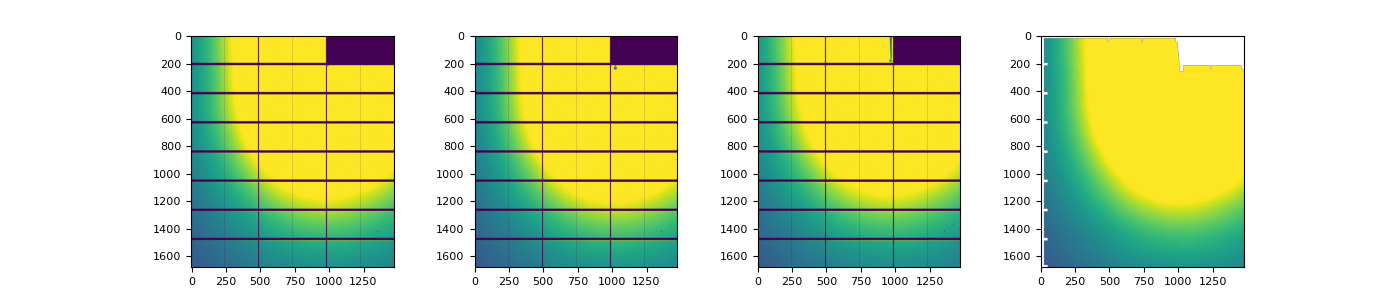

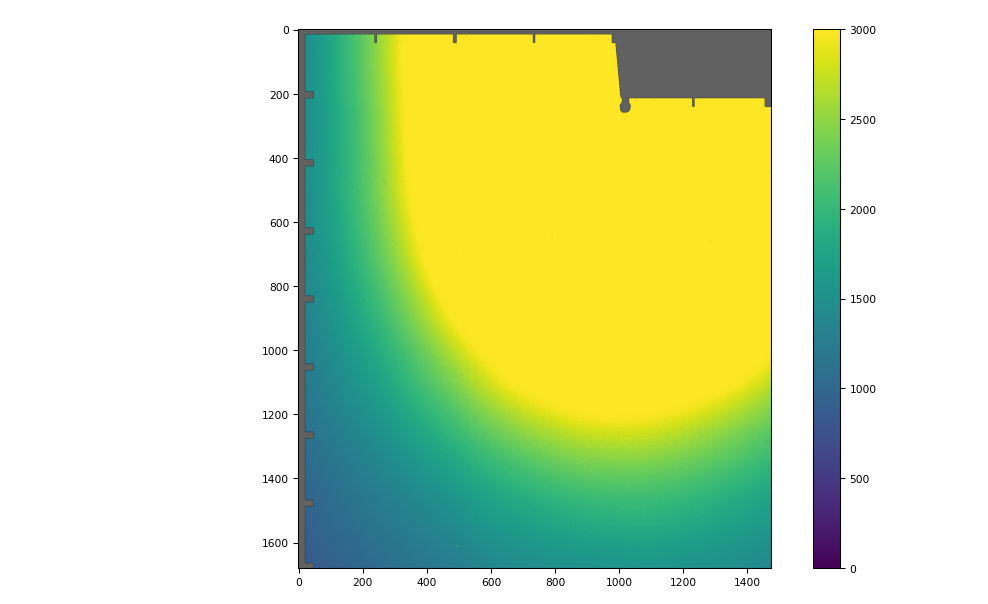

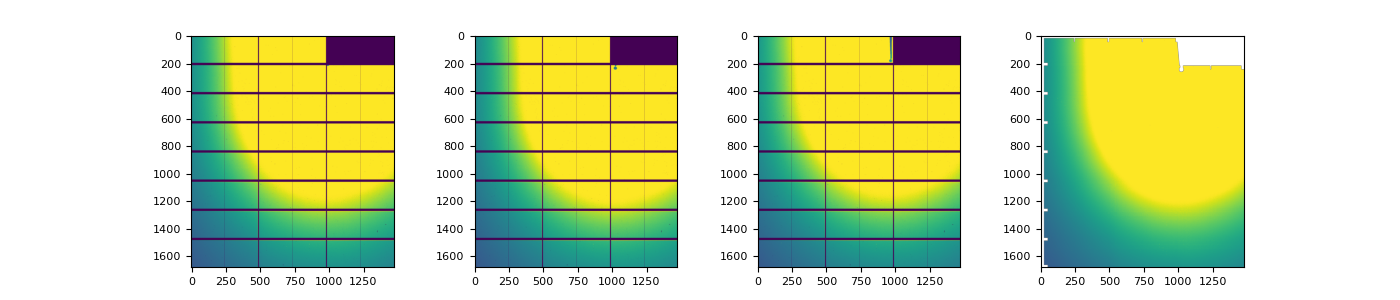

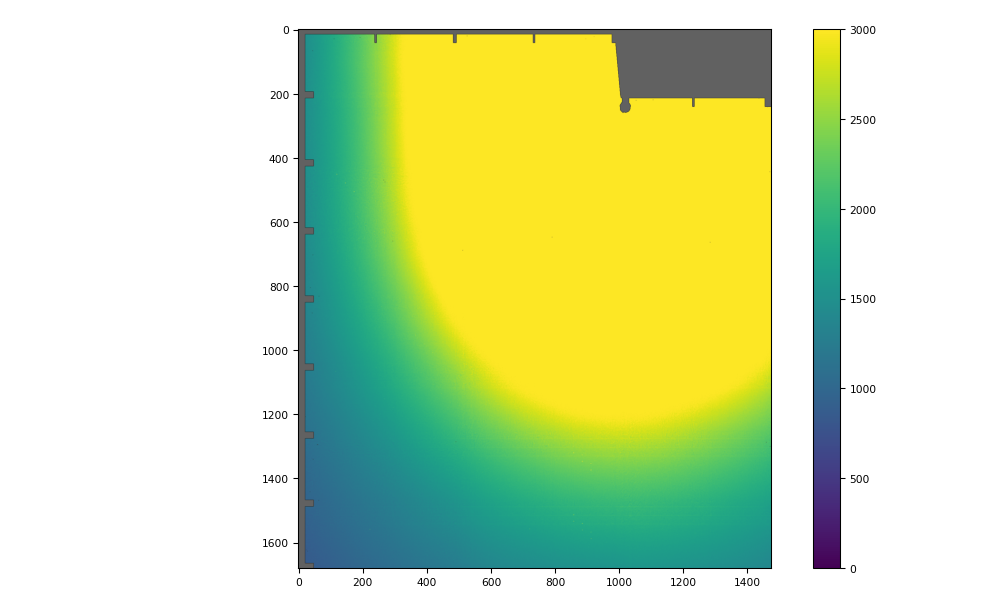

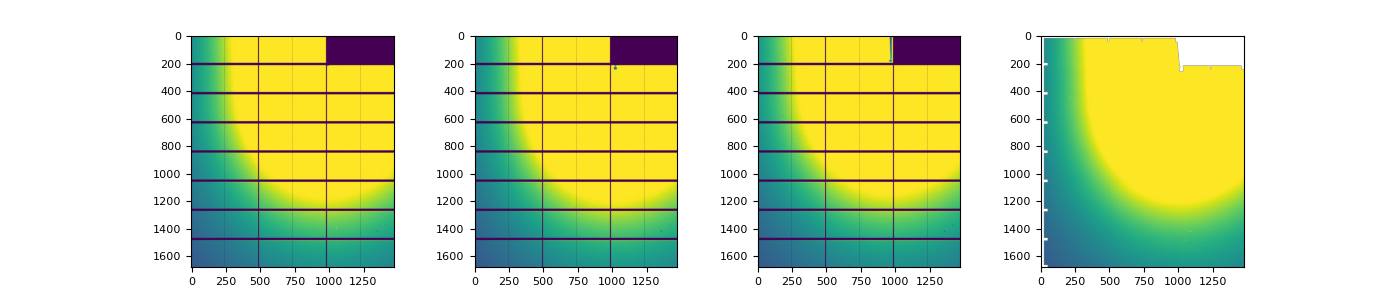

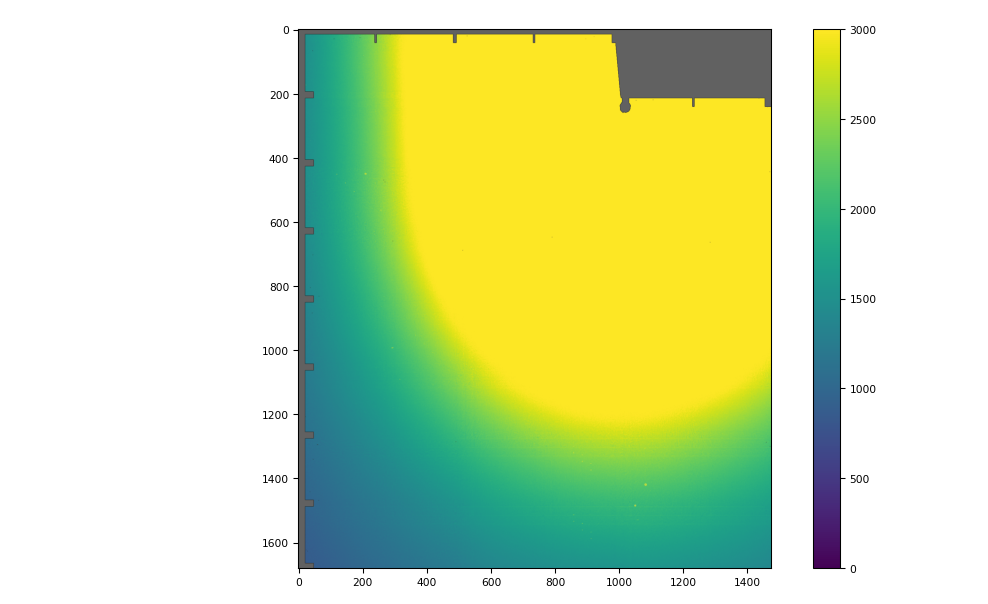

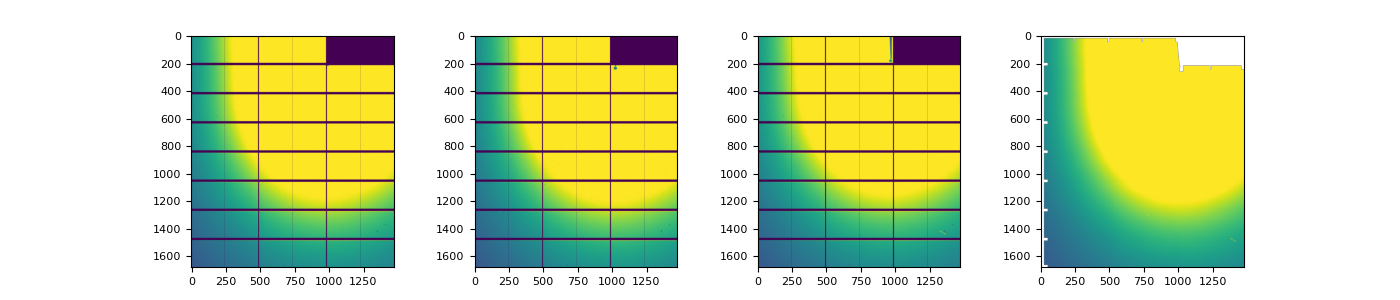

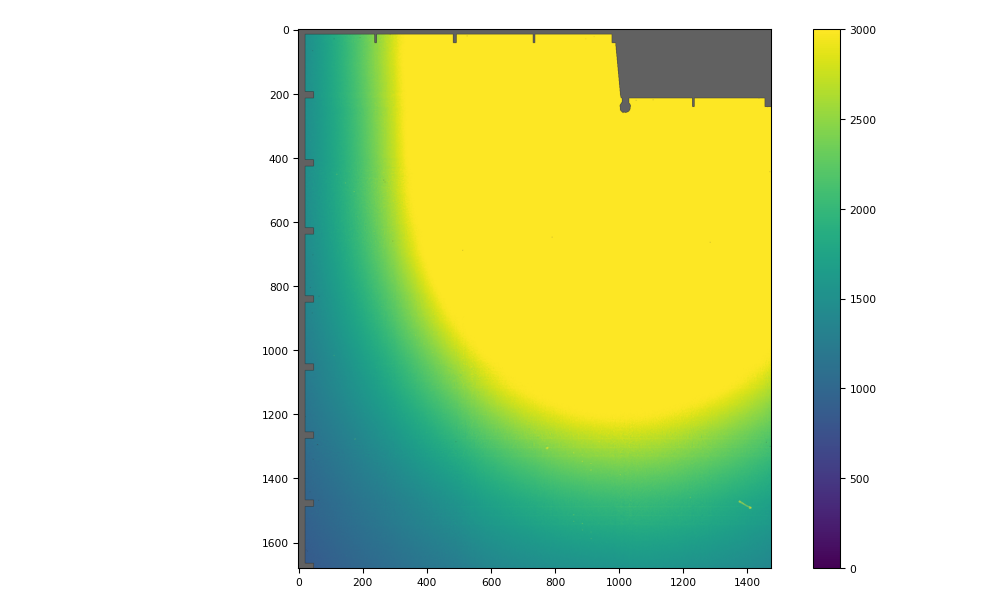

In [22]:
tiff_base_path = ('/Volumes/Data/2024-2/CdTe_TC_05_21_2024/tiff_base/MA_Empty_30Kapton_1pixel_offset/')
tiff_base_path = ('E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/A_emptykapton_Pilatus//')
use_mask_1 = np.load("E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/Milinda_mask/Mask_pos1_ext_BS.npy") # This is mask we are applying befor mergin images
use_mask_2 = np.load("E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/Milinda_mask/Mask_pos2_ext_BS.npy") # This is mask we are applying befor mergin images
use_mask_3 = np.load("E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/Milinda_mask/Mask_pos3_ext_BS.npy") # This is mask we are applying befor mergin images

# tiff_base_path = ('E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/tiff_base/A_Air-1//')

# use_mask_1 = np.load("E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/Mask_pos1_ext_BS.npy") # This is mask we are applying befor mergin images
# use_mask_2 = np.load("E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/Mask_pos2_ext_BS.npy") # This is mask we are applying befor mergin images
# use_mask_3 = np.load("E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/Mask_pos3_ext_BS.npy")



data_dir = tiff_base_path + "dark_sub"
meta_dir = tiff_base_path + "meta/"

Data = []
os.chdir(data_dir)
Tiff, Meta = [], []
total_num_img = 0
for file in os.listdir(data_dir):
    if file.endswith(".tiff"):
        Tiff.append(file)
        total_num_img = file
#A.sort(key=lambda x: os.path.getmtime(x))
for file in os.listdir(meta_dir):
    if file.endswith(".yaml"):
        Meta.append(file)
Tiff.sort()
Meta.sort()
Tiff

num_img = len(Tiff)
print("total number of images = ", num_img)

offset = 27
def sum_everything(my_im1, my_im2, my_im3, use_mask_1, use_mask_2, use_mask_3, osetx = offset, osety = offset):
    """ Assuming im2 offset by -osetx, -osety, and im3 offset by +osetx, +osety """
    
    my_imsum = np.ones((my_im1.shape[0]+int(2*osetx), my_im2.shape[1]+int(2*osety),3))*np.nan

    my_imsum[osetx:-osetx,osety:-osety,0] = my_im1
    my_imsum[osetx:-osetx,osety:-osety,0][use_mask_1==1] = np.nan

    my_imsum[:-int(2*osetx),:-int(2*osety):,1] = my_im2
    my_imsum[:-int(2*osetx),:-int(2*osety):,1][use_mask_2==1] = np.nan

    my_imsum[int(2*osetx):,int(2*osety):,2] = my_im3
    my_imsum[int(2*osetx):,int(2*osety):,2][use_mask_3==1] = np.nan

    return np.nanmean(my_imsum,axis=2)


for j in range (0, num_img, 3):

    print(Tiff[j+0])
    print(Tiff[j+1])
    print(Tiff[j+2])

    
    im_spotA = imread(Tiff[j+0]) #012,120,102,201,210
    im_spotB = imread(Tiff[j+1])
    im_spotC = imread(Tiff[j+2])

    #im_spotD = imread(Tiff[j+0]) #012,120,102,201,210
    #im_spotE = imread(Tiff[j+1])
    #im_spotF = imread(Tiff[j+2])

    with open(meta_dir + Meta[j+0], 'r') as f:
        meta_spotA = yaml.unsafe_load(f)
    with open(meta_dir + Meta[j+1], 'r') as f1:
        meta_spotB =  yaml.unsafe_load(f1)
    with open(meta_dir + Meta[j+2], 'r') as f2:
        meta_spotC = yaml.unsafe_load(f2)

    print (f"{len(im_spotA)=}")
    print (f"{len(im_spotB)=}")
    print (f"{len(im_spotC)=}")
    
    full_imsum = sum_everything(im_spotA, im_spotB, im_spotC, use_mask_1, use_mask_2, use_mask_3, osetx=offset, osety=offset)
    
    plt.figure(figsize=(14,3))
    ax1 = plt.subplot(141)
    plt.imshow(im_spotA,vmin=0,vmax=3000)
    plt.subplot(142,sharex=ax1, sharey=ax1)
    plt.imshow(im_spotB,vmin=0,vmax=3000)
    plt.subplot(143,sharex=ax1, sharey=ax1)
    
    plt.imshow(im_spotC,vmin=0,vmax=3000)
    plt.subplot(144,sharex=ax1, sharey=ax1)
    plt.imshow(full_imsum[0:1679, 0:1475],vmin=0,vmax=3000)
    
    #tifffile.imsave(data_dir + 'sum.tiff', full_imsum)
    print(np.shape(full_imsum))
    imshow(full_imsum[0:1679, 0:1475],vmin=0,vmax=3000)
    f1 = j+1
    f2 = j+3
    
    File_Name_Prefix = os.path.basename(tiff_base_path.rstrip('/'))
    #imsave(data_dir + "_" + 'A_emptykapton_sum' + str(f1) + "-" + str(f2) + '.tiff', full_imsum)
    imsave(f"{File_Name_Prefix}" + str(f1) + "-" + str(f2) +"_sum.tiff", full_imsum)

In [48]:
full_imsum.shape

(1733, 1529)